In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip show keras_preprocessing

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall tensorflow --yes
!pip install tensorflow-gpu==2.11.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 116.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tenso

In [ ]:
import numpy as np 
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
import datetime
from time import time
import itertools
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding,LSTM,Lambda, Dense
import keras.backend as K
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
## Loading the data set 
data=pd.read_csv('/content/drive/MyDrive/questions.csv')## quora question pair

In [ ]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [1]:
import gensim.downloader as api

Embedding_vectors =  api.load('word2vec-google-news-300')

In [ ]:
data.drop(['qid1','qid2'],axis=1,inplace=True)

In [ ]:
data.rename(columns={'id':'Unique_Id','question1':'text1','question2':'text2','is_duplicate':'similarity'},inplace=True)

In [ ]:
data.head()

,Unique_Id,text1,text2,similarity
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


`stopwords` are generally function words that do not carry a lot of meaning on their own, such as "the," "and," "a," "in," "of," and so on. 

In [ ]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Creating matrix of wordEmbedding

#### **Preprocessing the data**

In [ ]:
## Data Preprocessing
stops = set(stopwords.words('english'))
def text_to_word_list(text):
    ''' Pre \process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.split()
    return text


In [ ]:
# Prepare embedding
vocabulary = dict()
inverse_vocabulary = ['<unk>']  # '<unk>'  is only a placeholder for the [0, 0, ....0] embedding

##loading Embedding
word2vec = Embedding_vectors 
# KeyedVectors.load('fstwk.d2v') 

* **Create a new Vocabulary**

In [ ]:
##preparing both train and test data for tranining by creating embedding of each words in the text1 and text2
questions_cols_nbs = [1, 2]
# Iterate over the questions only of both training and test datasets
for index, row in data.iterrows():
    # Iterate through the text of both questions of the row
    for question in questions_cols_nbs:

        q2n = []  # q2n -> question numbers representation
        for word in text_to_word_list(row[question]):
            # Check for unwanted words
            if word in stops and word not in word2vec.key_to_index :
                continue
            if word not in vocabulary:
                vocabulary[word] = len(inverse_vocabulary)
                q2n.append(len(inverse_vocabulary))
                inverse_vocabulary.append(word)
            else:
                q2n.append(vocabulary[word])
        # Replace questions as word to question as number representation
        data.iat[index, question] = q2n

In [ ]:
data.shape

(404351, 4)

* **Define Embeddings for the vocabulary index of each Word**

In [ ]:
# creating embeding with 300 dimensions    
embedding_dim = 300
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
embeddings[0] = 0  # So that the padding will be ignored
# Build the embedding matrix
for word, index in vocabulary.items():
    if word in word2vec.key_to_index:
        embeddings[index] = word2vec.word_vec(word)

<ipython-input-23-5f1d89a641f6>:8: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  embeddings[index] = word2vec.word_vec(word)


In [ ]:
data.head()

,Unique_Id,text1,text2,similarity
0,0,"[1, 2, 3, 4, 5, 4, 6, 7, 8, 9, 10, 8, 11]","[1, 2, 3, 4, 5, 4, 6, 7, 8, 9, 10]",0
1,1,"[1, 2, 3, 12, 13, 14, 15, 16, 15, 17, 18]","[1, 19, 20, 21, 3, 22, 23, 24, 3, 13, 14, 15, ...",0
2,2,"[26, 27, 16, 28, 3, 29, 30, 31, 32, 33, 34, 35]","[26, 27, 31, 29, 36, 37, 5, 38, 39, 40]",0
3,3,"[41, 42, 16, 43, 44, 45, 26, 27, 16, 46, 47]","[48, 3, 49, 50, 51, 52, 53, 54, 51, 2, 55, 5, ...",0
4,4,"[56, 57, 58, 8, 59, 60, 61, 62, 63, 64, 65, 66]","[56, 67, 19, 68, 8, 62, 59]",0


* **Prepare Train and Test Data**

In [ ]:
questions_cols = ["text1", "text2"]

## findinf max length of text1 and text2 in both train an text for padding to make the both sentences length equal.
max_seq_length = max(data.text1.map(lambda x: len(x)).max(), data.text2.map(lambda x: len(x)).max())
                    #  .text1.map(lambda x: len(x)).max(),
                    #  valid.text2.map(lambda x: len(x)).max())

# Split to train validation
validation_size = 1000
training_size = len(data) - validation_size

X = data[questions_cols]
Y = data['similarity']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Split to dicts
X_train = {'left': X_train.text1, 'right': X_train.text2}
X_validation = {'left': X_validation.text1, 'right': X_validation.text2}
# X_test = {'left': valid.text1, 'right': valid.text2}

# Convert labels to their numpy representations
Y_train = Y_train.values
Y_validation = Y_validation.values

# Zero padding
for dataset, side in itertools.product([X_train, X_validation], ['left', 'right']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_seq_length)

""" assert help to check if the program is running smoothly if returns nothing 
if it is true but raises and error if it is false and stops further execution"""
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(Y_train)

#### Building model using Manhattan distance & LSTM RNN 

In [ ]:
from keras import Sequential, backend

# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 70
n_epoch = 10

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length, trainable=False)

# Embedded version of the inputs
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)
left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
mhd = lambda x: backend.abs(x[0] - x[1])
merged = Lambda(function=mhd, output_shape=lambda x: x[0], name='L1_distance')([left_output, right_output])

# sigmoid
preds = Dense(1, activation='sigmoid')(merged)

# Pack it all up into a model
malstm = Model(inputs=[left_input, right_input], outputs=preds)

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)



malstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


### **plot the architecture**

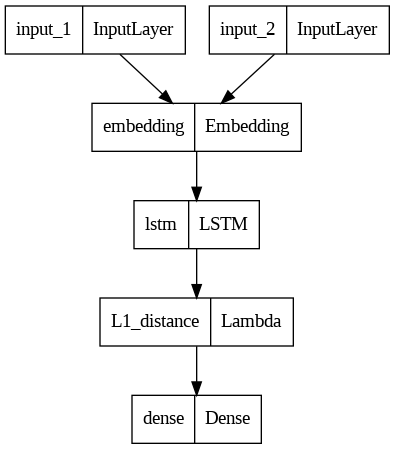

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(malstm)

### **Train the model and validate it :**

In [ ]:
# Start training
n_epoch = 25
training_start_time = time()

malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=2000, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], Y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Epoch 1/25
202/202 [==============================] - 46s 179ms/step - loss: 0.1956 - accuracy: 0.6701 - val_loss: 0.1806 - val_accuracy: 0.7210
Epoch 2/25
202/202 [==============================] - 36s 176ms/step - loss: 0.1645 - accuracy: 0.7581 - val_loss: 0.1631 - val_accuracy: 0.7630
Epoch 3/25
202/202 [==============================] - 36s 179ms/step - loss: 0.1506 - accuracy: 0.7837 - val_loss: 0.1540 - val_accuracy: 0.7720
Epoch 4/25
202/202 [==============================] - 36s 178ms/step - loss: 0.1413 - accuracy: 0.8002 - val_loss: 0.1489 - val_accuracy: 0.7840
Epoch 5/25
202/202 [==============================] - 37s 181ms/step - loss: 0.1344 - accuracy: 0.8113 - val_loss: 0.1426 - val_accuracy: 0.7970
Epoch 6/25
202/202 [==============================] - 36s 180ms/step - loss: 0.1288 - accuracy: 0.8199 - val_loss: 0.1401 - val_accuracy: 0.8000
Epoch 7/25
202/202 [==============================] - 37s 182ms/step - loss: 0.1240 - accuracy: 0.8277 - val_loss: 0.1358 - val_ac

## Trying out the model

In [ ]:
new_text = "How to get familiar with machine learning?"
same_text = "What should I do to learn machine learning?"
dif_text = "Should machine learning be taught in kindergarten?"

In [ ]:
dfnew = pd.DataFrame(np.array([[new_text, same_text], [new_text, dif_text]]),
                   columns=['text1', 'text2'])

text1_preprocess = dfnew['text1'].apply(text_to_word_list)
text2_preprocess = dfnew['text2'].apply(text_to_word_list)

t1v = list()
t2v = list()

In [ ]:
for row_text1 in text1_preprocess:
  t1_num = []
  for word in row_text1 :
      if word in vocabulary:
          t1_num.append(vocabulary[word])
  t1v.append(t1_num)

for row_text2 in text2_preprocess:
  t2_num = []
  for word in row_text2: 
    if word in vocabulary:
      t2_num.append(vocabulary[word])
  t2v.append(t2_num)

In [ ]:
x_new = pd.DataFrame(zip(t1v, t2v), columns=["text1", "text2"])
x_new

,text1,text2
0,"[26, 344, 10604, 175, 874, 875]","[1, 84, 16, 97, 133, 874, 875]"
1,"[26, 344, 10604, 175, 874, 875]","[84, 874, 875, 36, 5064, 8, 20834]"


In [ ]:
# Split to dicts
X_test = {'left': x_new.text1, 'right': x_new.text2}
# Zero padding
for dataset, side in itertools.product([X_test], ['left', 'right']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_seq_length)
assert X_test['left'].shape == X_test['right'].shape

In [ ]:
result = malstm.predict([X_test['left'], X_test['right']])

1/1 [==============================] - 1s 650ms/step


In [ ]:
result

array([[0.81609535],
       [0.00804362]], dtype=float32)

- We got the probability of similar questions larger then the probability of similarity between two diffirent questions

### Save The Model

In [ ]:
malstm.save("malstm_model")

In [ ]:
from keras.models import load_model

new_m = load_model("malstm_model")

new_m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 212)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 212)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 212, 300)     25806300    ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 50)           70200       ['embedding[0][0]',          